In [22]:
import json
import matplotlib.pyplot as plt
FIGSIZE=(36, 12)
DPI=200
SCOPE = 480

# Constants for font sizes
LEGEND_FONTSIZE = 18
AXIS_FONTSIZE = 18
TICK_FONTSIZE = 16
TEXT_FONTSIZE = 16

480


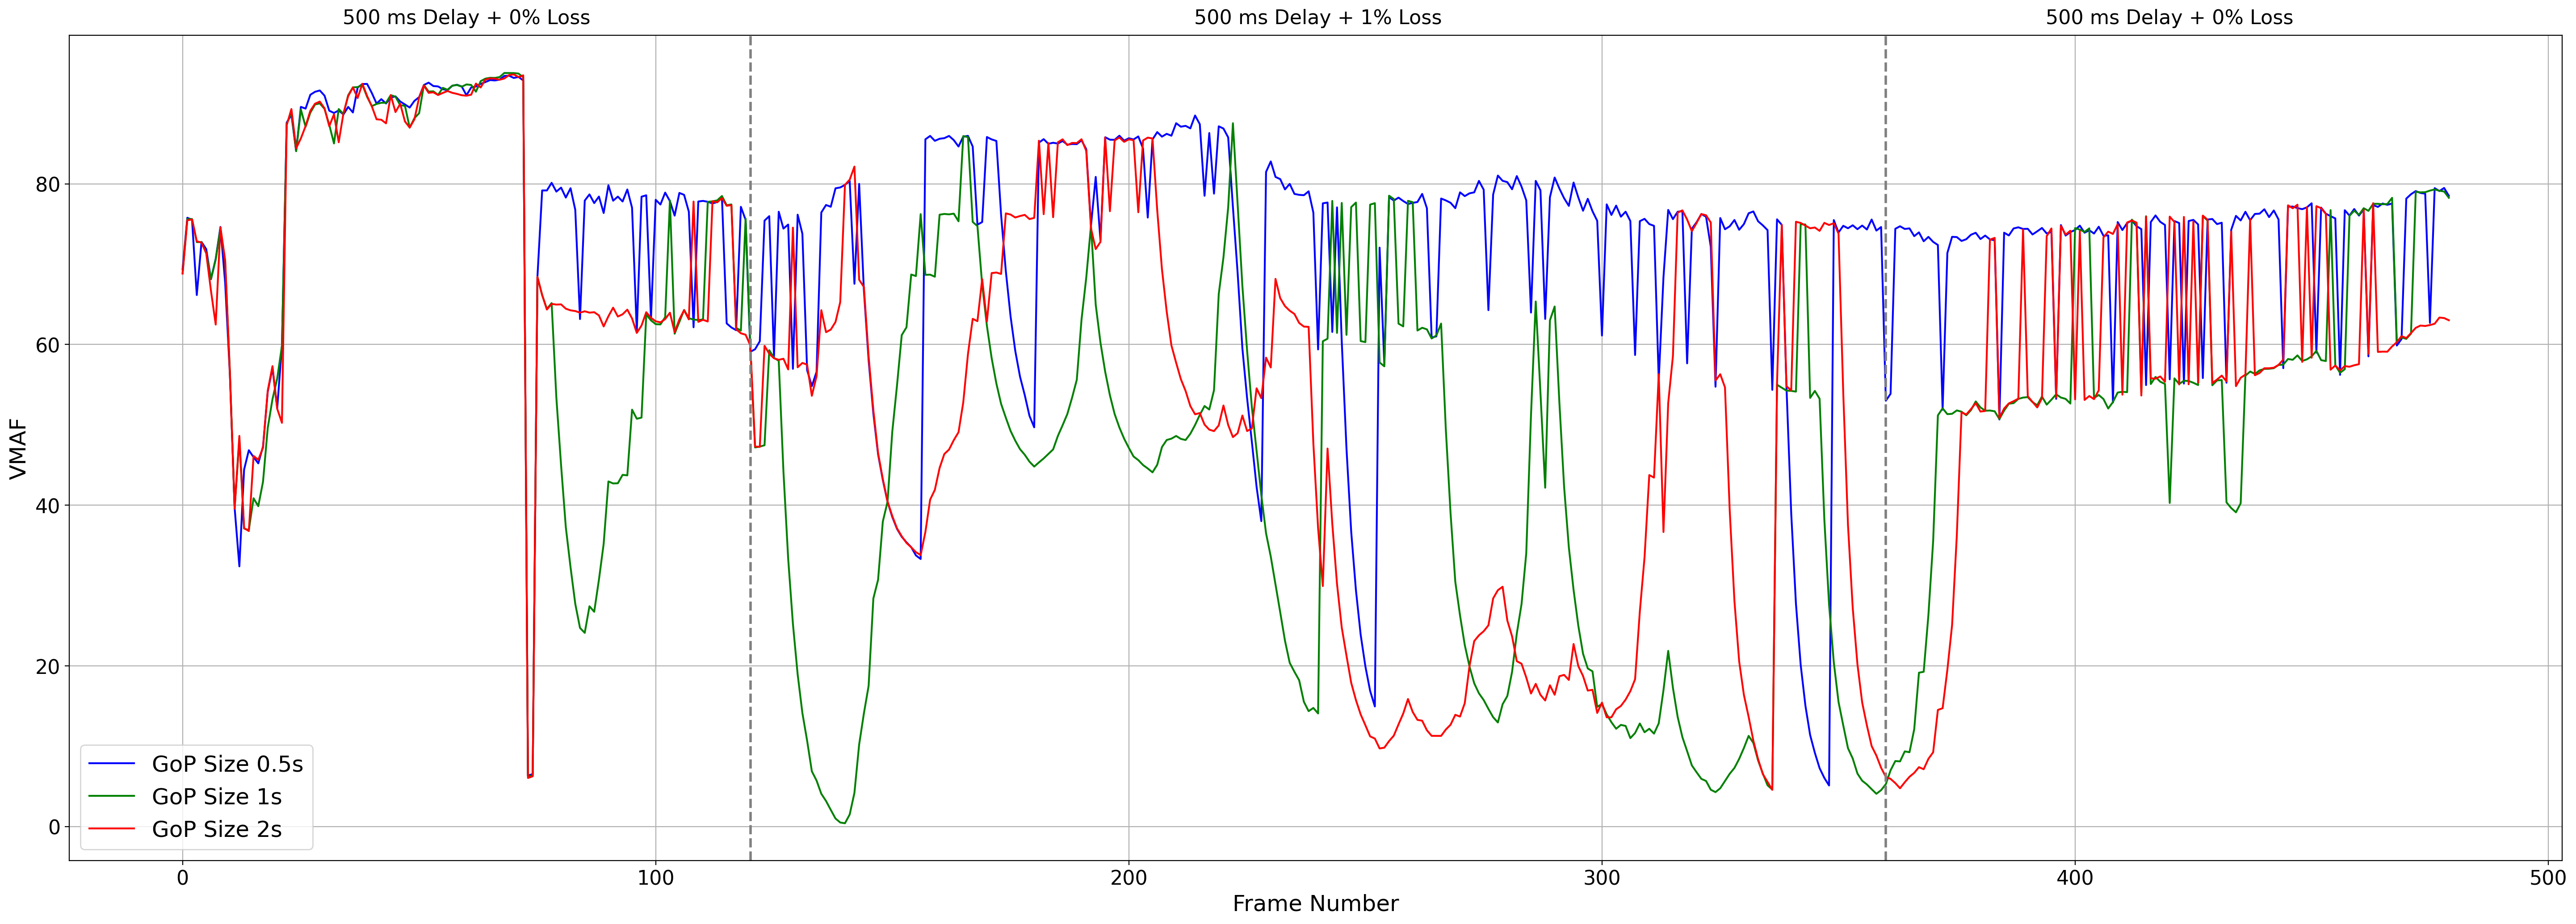

In [25]:
# Function to load VMAF data from a file
def load_vmaf_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    frame_nums = [frame['frameNum'] for frame in data['frames']]
    vmaf_scores = [frame['metrics']['vmaf'] for frame in data['frames']]
    return frame_nums, vmaf_scores

def calculate_vmaf():
    # File paths for the three JSON files
    file_paths = ['packet_loss_output_12_vs_12.json', 
                'packet_loss_output_24_vs_24.json', 
                'packet_loss_output_48_vs_48.json']

    # Load the VMAF data from each file
    vmaf_data = [load_vmaf_data(file_path) for file_path in file_paths]
    print(len(vmaf_data[0][0]))

    # Plot the VMAF scores
    plt.figure(figsize=FIGSIZE, dpi=DPI)
    colors = ['b', 'g', 'r']
    labels = ['GoP Size 0.5s', 'GoP Size 1s', 'GoP Size 2s']

    for i, (frame_nums, vmaf_scores) in enumerate(vmaf_data):
        plt.plot(frame_nums[:SCOPE], vmaf_scores[:SCOPE],  linestyle='-', color=colors[i], label=labels[i])

    # Add background text
    plt.axvline(x=120, color='grey', linestyle='--', linewidth=2)
    plt.axvline(x=360, color='grey', linestyle='--', linewidth=2)
    plt.text(60, max(max(vmaf_scores) for _, vmaf_scores in vmaf_data) * 1.06, '500 ms Delay + 0% Loss', 
             horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=TEXT_FONTSIZE, 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    plt.text(240, max(max(vmaf_scores) for _, vmaf_scores in vmaf_data) * 1.06, '500 ms Delay + 1% Loss', 
             horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=TEXT_FONTSIZE, 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    plt.text(420, max(max(vmaf_scores) for _, vmaf_scores in vmaf_data) * 1.06, '500 ms Delay + 0% Loss', 
             horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=TEXT_FONTSIZE, 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    # plt.title('VMAF across Frames for Different Outputs')
    plt.xlabel('Frame Number', fontsize=AXIS_FONTSIZE)
    plt.ylabel('VMAF', fontsize=AXIS_FONTSIZE)
    plt.xticks(fontsize=TICK_FONTSIZE)
    plt.yticks(fontsize=TICK_FONTSIZE)
    plt.legend(loc='lower left', fontsize=LEGEND_FONTSIZE)

    plt.grid(True)

    plt.savefig(f'plots/dynamic-packet-loss-gop-vs-gop-vmaf-over-time.pdf', bbox_inches='tight')

calculate_vmaf()



In [9]:
# Function to read JSON data from a file
def read_json_from_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def calculate_I_P_interval():
    # Path to your JSON file
    file_path = 'frames.json'

    # Read JSON data from the file
    data = read_json_from_file(file_path)

    # Extracting frame numbers and picture types
    frame_numbers = list(range(len(data['frames'])))  # Frame numbers starting from 0
    print(len(frame_numbers))
    pict_types = [frame['pict_type'] for frame in data['frames']]

    # Convert picture types to numeric values for plotting
    pict_type_map = {'I': 2, 'P': 1}
    pict_type_numbers = [pict_type_map.get(pict_type, 0) for pict_type in pict_types]

    # Plotting the data
    plt.figure(figsize=FIGSIZE, dpi=DPI)
    plt.plot(frame_numbers[:SCOPE], pict_type_numbers[:SCOPE], marker='o', linestyle='-', color='r')
    plt.xlabel('Frame Number')
    plt.ylabel('Picture Type')
    plt.title('Time Series of Picture Types')
    plt.yticks([2, 1], ['I', 'P'])  # Map numeric values back to picture types
    plt.grid(True)
    plt.tight_layout()

    # Show plot
    plt.show()

In [5]:
def calculate_I_P_intervals():
    # List of file paths for your JSON files
    file_paths = [
        'frames-12.json',
        'frames-24.json',
        'frames-48.json',
        #'/Users/birkandenizer/Downloads/GoP_tests/frames.json'
    ]

    # Colors and labels for the plots
    colors = ['b', 'g', 'r', 'm']
    labels = ['GoP 12', 'GoP 24', 'GoP 48', 'Original']

    # Plot each file's data
    plt.figure(figsize=FIGSIZE, dpi=DPI)

    for i, file_path in enumerate(file_paths):
        # Read data from the file
        data = read_json_from_file(file_path)

        # Extract frame numbers and picture types
        frame_numbers = list(range(len(data['frames'])))  # Frame numbers starting from 0
        pict_types = [frame['pict_type'] for frame in data['frames']]

        # Convert picture types to numeric values for plotting
        pict_type_map = {'I': 2, 'P': 1}
        pict_type_numbers = [pict_type_map.get(pict_type, 0) for pict_type in pict_types]

        # Plot the data
        plt.plot(frame_numbers[:SCOPE], pict_type_numbers[:SCOPE], marker='o', linestyle='-', color=colors[i], label=labels[i])

    # Adding plot details
    plt.xlabel('Frame Number')
    plt.ylabel('Picture Type')
    plt.title('Time Series of Picture Types for Multiple Datasets')
    plt.yticks([2, 1], ['I', 'P'])  # Map numeric values back to picture types
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show plot
    plt.show()

480


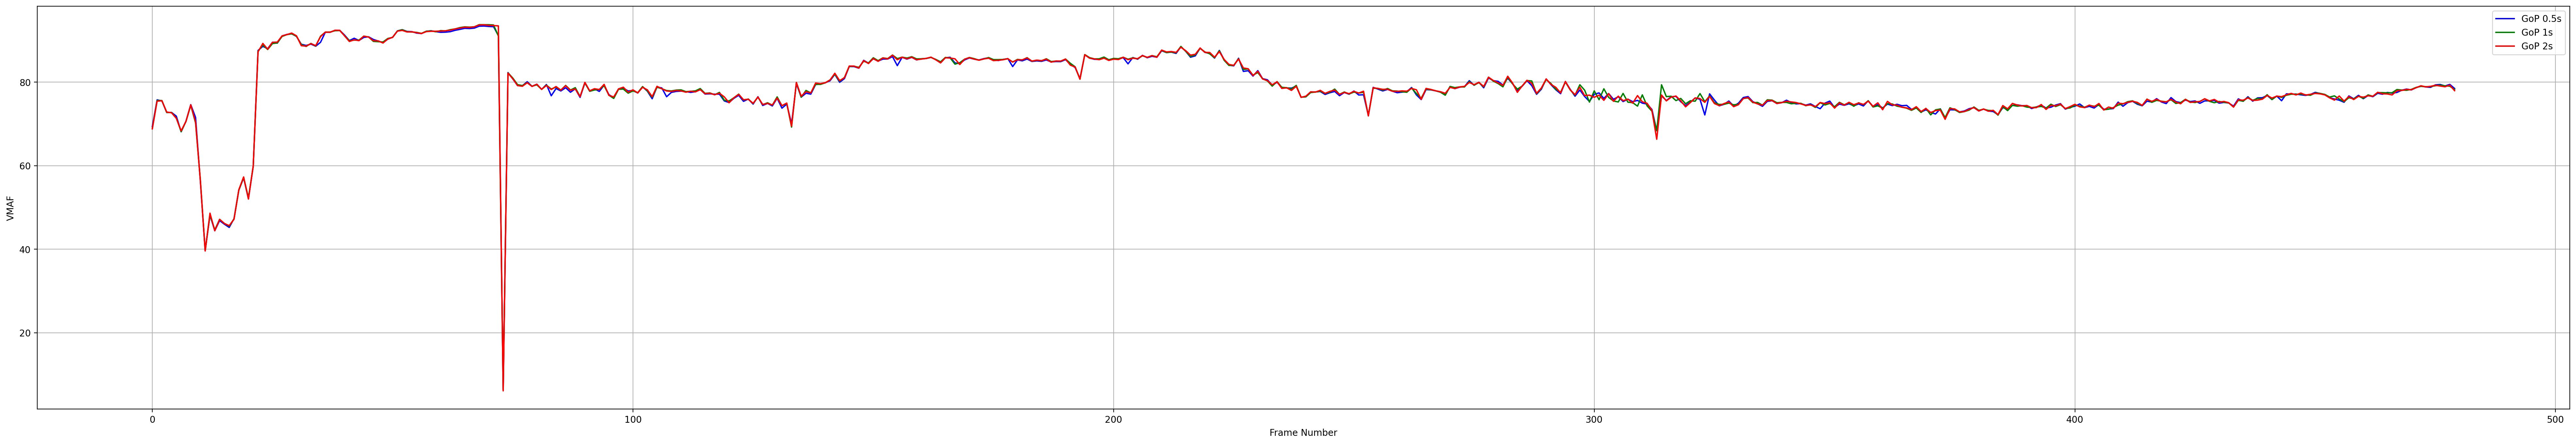

In [10]:
calculate_vmaf()

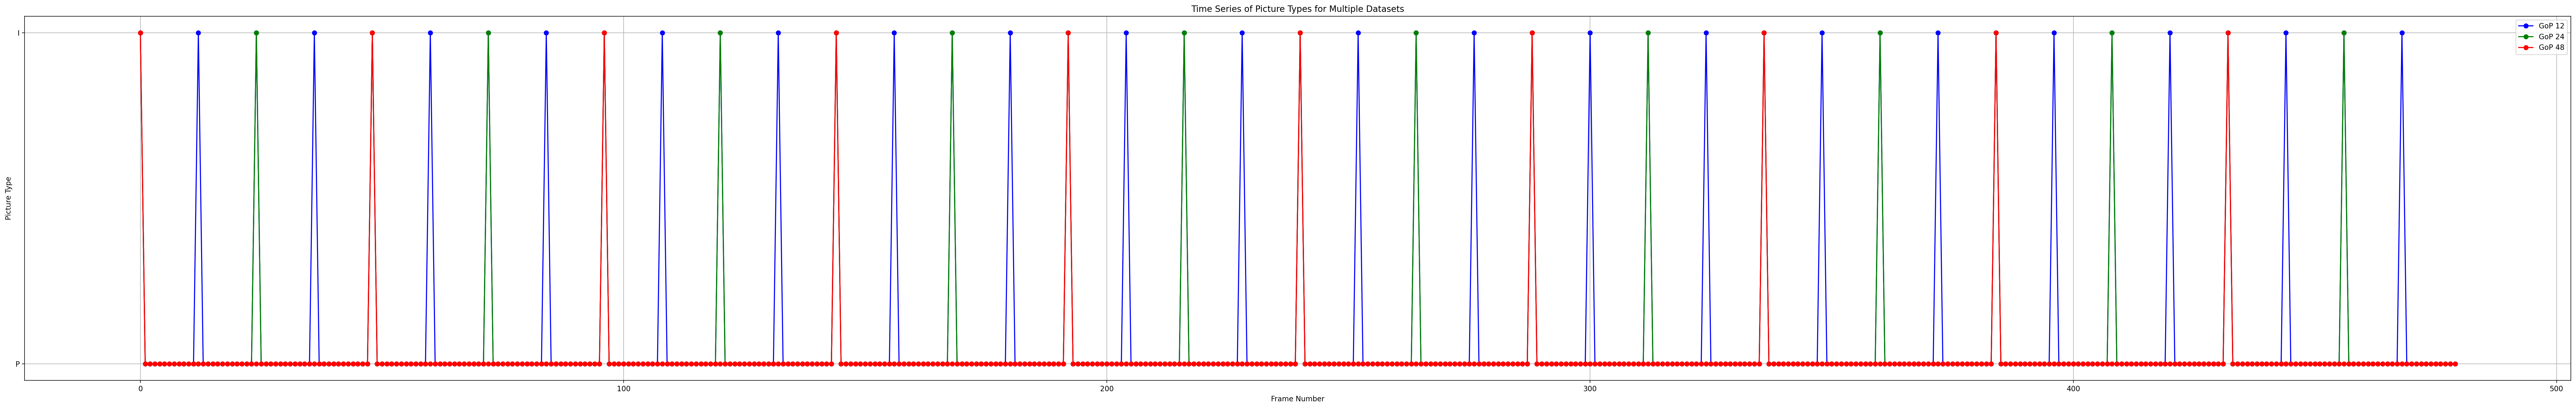

In [7]:
calculate_I_P_intervals()

14315


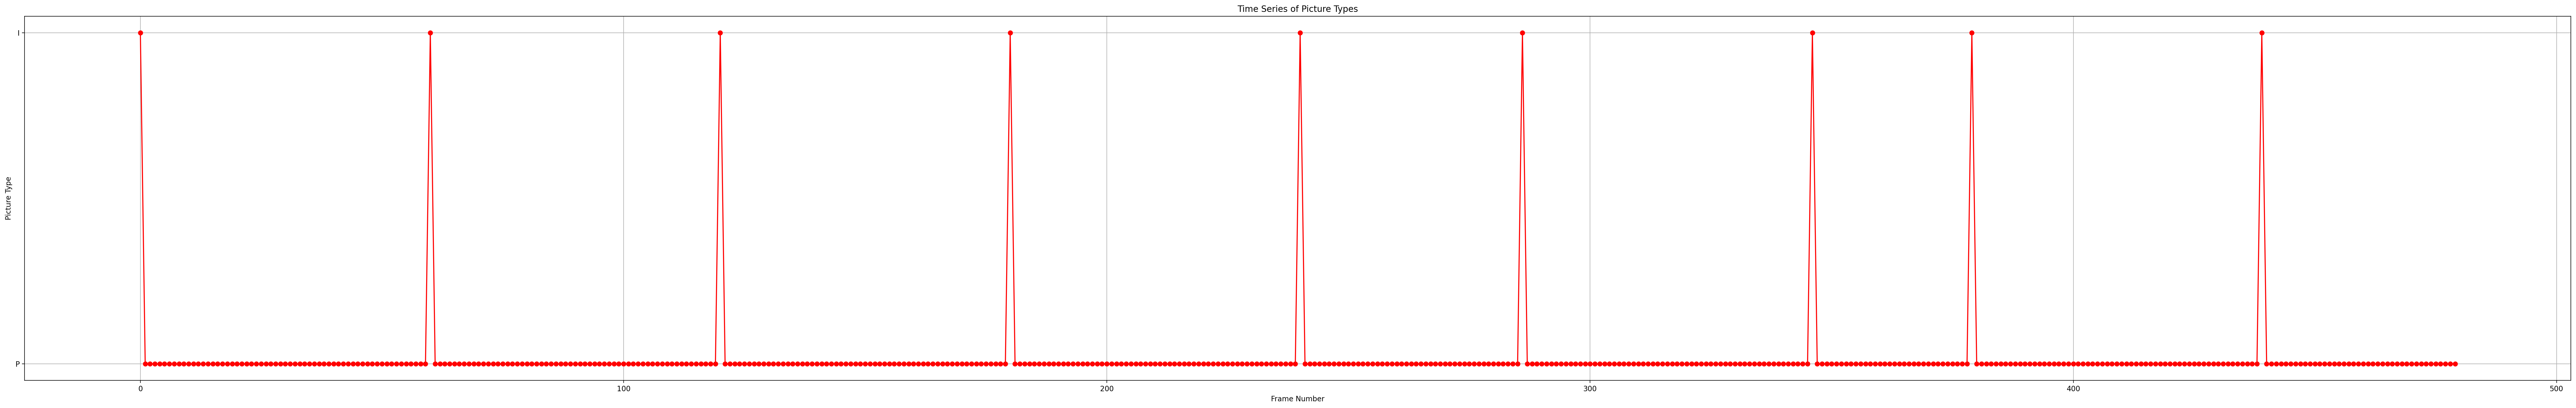

In [8]:
calculate_I_P_interval()